## Image Caption Generation Using `vit-gpt2-image-captioning`

In [ ]:
!pip install transformers

In [9]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

from typing import Dict, List

## Image Caption Generation

1. Loads a pre-trained `VisionEncoderDecoderModel` from the `"nlpconnect/vit-gpt2-image-captioning"` checkpoint using the `from_pretrained` method. The `VisionEncoderDecoderModel` is a deep learning model that can encode images and decode captions, and it is built on top of the `GPT-2` architecture.

2. The `ViTImageProcessor` is a deep learning model that can extract visual features from images using the Vision Transformer (ViT) architecture.

3. The `AutoTokenizer` is a utility class that can be used to tokenize text into individual tokens that can be fed into a deep learning model like the `VisionEncoderDecoderModel`. It automatically selects the appropriate tokenizer based on the model being used.

In [4]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [3]:
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [5]:
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
# set the device GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# The to() method is a PyTorch function that moves a tensor or a model to the specified device.
model.to(device)

In [8]:
# maximum length of the generated caption
max_length: int = 16   

# beam search number of different caption candidates that the model should 
# generate at each step of the decoding process.
num_beams: int = 5

# pass this as argument to generate function
gen_kwargs: Dict[str, int] = {"max_length": max_length, "num_beams": num_beams}

In [11]:
def read_image(img_path: str):
    """
    Reads an image from file and converts it to RGB mode.

    Args:
        img_path (str): File path to the image.

    Returns:
        PIL.Image.Image: Image object in RGB mode.
    """
    
    # Read the image using Pillow
    img = Image.open(img_path)

    # convert the image into RGB mode
    if img.mode != "RGB":
      img = img.convert(mode="RGB")
    
    return img


def generate_captions(image_paths: List[str]) -> List[str]:
    """
    Generates captions for a list of image paths.

    Args:
        image_paths (List[str]): List of file paths to images.

    Returns:
        List[str]: List of generated captions for the input images.
    """

    # read the images and convert them to RGB mode
    images = [read_image(img_path) for img_path in image_paths]

    # extract image features from images, return image features as a PyTorch tensor
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values

    # pixel_values tensor to the device specified by the device
    pixel_values = pixel_values.to(device)

    # generate a caption for the given pixel_values tensor
    output_ids = model.generate(pixel_values, **gen_kwargs)

    # convert the token IDs in output_ids to text
    captions = tokenizer.batch_decode(output_ids, skip_special_tokens=True)

    #  removes any leading or trailing whitespace from each caption
    captions = [caption.strip() for caption in captions]

    return captions

In [12]:
# test image paths
images = [
    "/content/Image1.png",
    "/content/Image2.png",
    "/content/Image3.png"
]

In [19]:
# Generating captions for those images
generated_captions = generate_captions(images)

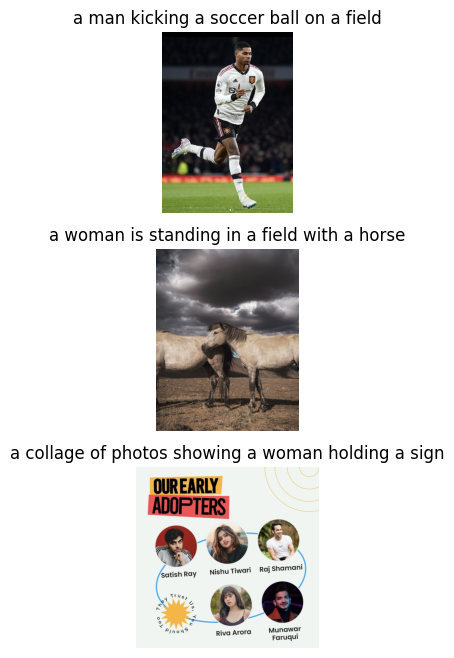

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, img in enumerate(images):
    img_ = Image.open(img)
    plt.subplot(3, 1, i + 1)
    plt.imshow(img_)
    plt.axis("off")
    plt.title(f"{generated_captions[i]}")